## ISYE 6740 - Assignment 1 - Regression

### 1. OLS Linear Regression

* In this question, we use a dataset of concrete to study OLS linear regression. For both training and testing data, the first 8 columns are features of concrete and the last column is "Concrete compressive strenth". We will train a linear regression model to predict the target variable of "Concrete compressive strenth".
* Please refer to the following package for OLS linear regression:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* For this regression problem, we use Mean Square Error (MSE) as the metric to evaluate the performance of trained models. Given $n$ samples, let $\{Y_i\}_{i=1}^n$ be the observed values of the variable being predicted and $\{\hat{Y}_i\}_{i=1}^n$ be the predicted values. Then the MSE of the predictor is computed as 
<center>$\text{MSE} = \frac{1}{n} \sum_{i=1}^n (Y_i-\hat{Y}_i)^2$.

#### a) Traing a linear regression model using the training set and report the training MSE.

Important note: I solved the assignment in a local environment and just copied my solutions into that notebook. Therefore, the statistic about how much time I spend on this assignment is not true.

In [1]:
### Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm
import warnings

# Suppress the FutureWarning related to the mode function
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
### Import Datasets
df1_train = pd.read_excel('./Q1_train.xls')
df1_test = pd.read_excel('./Q1_test.xls')

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, y_train = df1_train.iloc[:, :-1], df1_train.iloc[:, -1]
X_test, y_test = df1_test.iloc[:, :-1], df1_test.iloc[:, -1]

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = model.predict(X_train)

# Calculate Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_train, y_pred_train)

print("Training Mean Squared Error (MSE):", mse)

Training Mean Squared Error (MSE): 101.06509371850498


#### b) Evalaute the learnt model using the testing set. Please report the testing MSE.

In [4]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)

print("Testing Mean Squared Error (MSE):", mse)

Testing Mean Squared Error (MSE): 130.57162483135338


#### c) Which of the MSEs on the training and testing sets is larger? Why?

The mean squared error of the training (101.06509371850498) set is smaller than the mean squared error (130.57162483135338) of the testing set. This is often the case in machine learning, including in linear regression, since the regression is trained to minimize the error of the training dataset. Especially, when the model is evaluated on data it has never seen before (i.e., the testing set), its performances declines normally, leading to a higher MSE which makes sense. However, sometimes, when we overfit the model, the training error can be smaller than the testing error.

#### d) If we have infintely many training data points, can we make MSE (on the testing set) of our model as small as possible? Why?

"All models are wrong, but some are useful!" (George E. P. Box (1919 – 2013)). In our case, even with infinitely many training data points, we cannot reduce the testing error to 0, since the best we can do is to get to the "Oracle" model. However, the function of the "True" model might not be linear, which is often a too simple approximation in practice. Therefore, our best linear model
still cannot reduce the error term to the "as small as possible" value, since the true function might be polynomial or even more complex. Another thing which we should take into consideration at that point is the quality of those additional datapoints (see answer 3.c). Depending on the noise term prevalent, additional datapoints can have a negative effect on a linear regression model.

#### e) Use gradient descent to train a linear regression model. Recall that the objective function is 
<center>$\hat{w}=\mathop{\arg\min}_{w}\frac{1}{n} \sum_{i=1}^n (Y_i-X_i^\top w)^2$</center>
    
Here, set max_iteration = 1e5, stepsize = 6e-7, and stopping criterion = 1e-5. Please compute the gradient of the parameters and then follow the algorithm outline to finish your codes. 

#### Please plot the optimization error $\text{Opt. Err.} = \|\hat{w}-w^{(k)}\|_2^2$ vs iteration, where $\hat{w}$ is the coefficient vector (including intercept) learnt in a) and $w^{(k)}$ is the coefficient vector at the $k$-th iteration of gradient descent.

In [5]:
# Set hyperparameters
max_iterations = int(1e5)
step_size = 6e-7
stopping_criterion = 1e-5

# Initialize coefficients vector w and w_hat
w = np.zeros((X_train.shape[1] + 1))
w_hat = [model.intercept_] + list(model.coef_)

# Initialize lists to store optimization error and iteration number
optimization_error_training = []
iteration_number_training = []
mse_list_test = []

#initialize parameter vetor w.
#loop t=1:max_iter:
#    update w using gradient (Hint: compute X'X and X'Y).
#    Compute the testing MSE of parameter w.
#    Stop the iteration if the 2-norm of gradient is smaller than 1e-5.

for iteration in tqdm(range(max_iterations)):
    # Add a column of ones to X_train for the intercept term
    X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

    # Calculate the gradient of the objective function
    gradient = (1 / X_train.shape[0]) * X_train_b.T.dot(X_train_b.dot(w) - y_train)
    
    # Update the coefficients using gradient descent
    w = w - step_size * gradient
    
    # Calculate optimization error (L2 norm)
    opt_error_training = np.linalg.norm(w_hat - w, ord=2)**2
    
    # Add a column of ones to X_test for the intercept term
    X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

    # Calculate the predicted testing values
    y_pred_test = X_test_b.dot(w)

    # Calculate testing MSE
    mse_test = np.mean((y_pred_test - y_test)**2)

    # Append the optimization error and iteration number to the lists
    optimization_error_training.append(opt_error_training)
    iteration_number_training.append(iteration)
    mse_list_test.append(mse_test)
    
    # Check stopping criterion
    if opt_error_training < stopping_criterion:
        break

100%|██████████| 100000/100000 [00:23<00:00, 4231.45it/s]


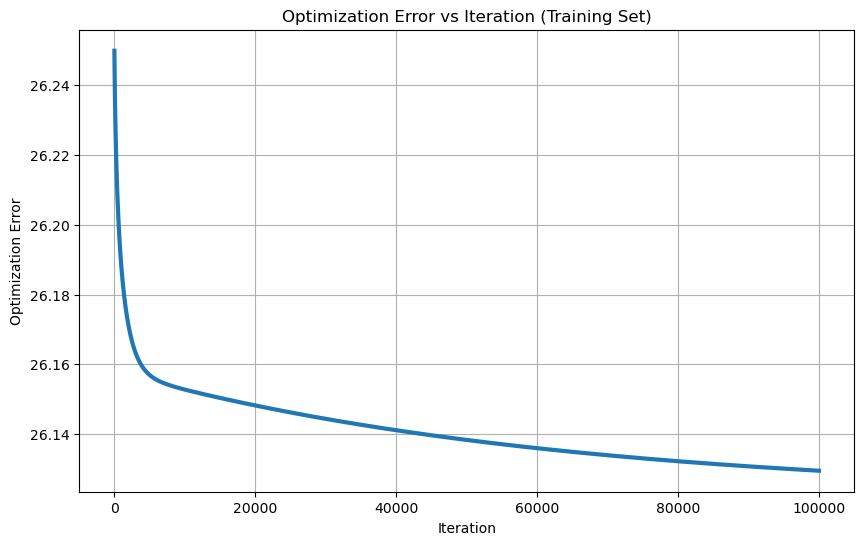

In [6]:
# Plot optimization error vs iteration
plt.figure(figsize=(10, 6))
plt.plot(iteration_number_training, optimization_error_training, linewidth=3.0)
plt.title('Optimization Error vs Iteration (Training Set)')
plt.xlabel('Iteration')
plt.ylabel('Optimization Error')
plt.grid(True)
plt.show()

In [7]:
# Find the index of the minimum value of the optimization problem
value_to_find = min(optimization_error_training)
index = optimization_error_training.index(value_to_find)
print("Index of", value_to_find, "is", index)

Index of 26.129491592003134 is 99999


In [8]:
# Find the index of a relatively small value of the optimization problem
mse_list_arr = np.array(mse_list_test)
mse_list_arr = mse_list_arr[~(mse_list_arr < 131.542)] # set the target value manually when looking into the list

print("Index of", optimization_error_training[len(mse_list_arr)-1], "is", len(mse_list_arr))

Index of 26.153596252835847 is 8492


#### f) Please plot the testing MSE vs iteration.

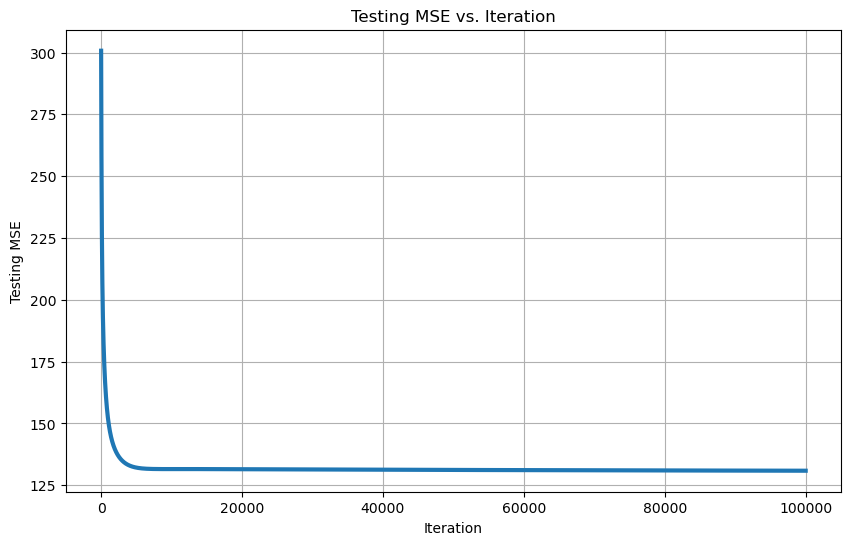

In [9]:
# Plot optimization error vs iteration
plt.figure(figsize=(10, 6))
plt.plot(range(iteration + 1), mse_list_test, linewidth=3.0)
plt.xlabel('Iteration')
plt.ylabel('Testing MSE')
plt.title('Testing MSE vs. Iteration')
plt.grid(True)

In [10]:
# Find the index of the minimum value of the optimization problem (MSE related)
value_to_find = min(mse_list_test)
index = mse_list_test.index(value_to_find)
print("Index of", value_to_find, "is", index)

Index of 130.87382370395613 is 99999


In [11]:
# Find the index of a relatively small value of the optimization problem (MSE related)
print("Index of", mse_list_test[len(mse_list_arr)-1], "is", len(mse_list_arr))

Index of 131.54200155075108 is 8492


#### g) Given what you have observed in e) and f), what can you say about the number of iterations we need from a prediction perspective? Why?

The choice of the hyperparameters (e.g. learning rate) influence the number of interations and the precision of the final outcome. Given our observations and the learnt knowledge from the class, we just need 8,492 iterations until we encounter a threshold where we could stop our minimization problem algorithm, even though the minimum of the optimization problem is not reached yet. This is due to the fact, that between the 8,942 iteration and the 99,999 iteration the increase in accuracy on the testing MSE is 0.51%, which is quite small in comparison to the computational cost (if considered on a problem in practice). Furthermore, when comparing my outcome of the gradient descent algorithm with the linear regression from a), I am assured that the outcome makes sense, since my MSE from f) converges to the one of b).

### 2. Robust Regression

* Please find the Concrete dataset for Q2.
* This dataset is very similiar that of Q1, but the training set is contaminated.
* Please refer to the following package for quantile regression:
https://scikit-learn.org/stable/auto_examples/linear_model/plot_quantile_regression.html
* Note that the quantile regression is identical to LAD regression when using 50% quantile. 

#### a) Train a linear regression model on the training dataset using OLS, and report the testing MSE.

In [12]:
### Import Datasets
df2_train = pd.read_excel('./Q2_train.xls')
df2_test = pd.read_excel('./Q2_test.xls')

In [13]:
X_train, y_train = df2_train.iloc[:, :-1], df2_train.iloc[:, -1]
X_test, y_test = df2_test.iloc[:, :-1], df2_test.iloc[:, -1]

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)

print("Testing Mean Squared Error (MSE):", mse)

Testing Mean Squared Error (MSE): 173.65733448483672


#### b) Train a linear regression model on the training dataset using LAD (set regularization constant alpha =1), and report the testing MSE.

In [14]:
### Import Packages
from sklearn.utils.fixes import parse_version, sp_version

# This is line is to avoid incompatibility if older SciPy version.
# You should use `solver="highs"` with recent version of SciPy.
solver = "highs" if sp_version >= parse_version("1.6.0") else "interior-point"

In [15]:
from sklearn.linear_model import QuantileRegressor

# Set paramaters
quantile_LAD = 0.50
alpha = 1.0

# Create a LAD Regression model
qr = QuantileRegressor(quantile=quantile_LAD, alpha=alpha, solver=solver)

# Train the model on the training data
qr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = qr.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)

print("Testing Mean Squared Error (MSE):", mse)

Testing Mean Squared Error (MSE): 137.7399386816783


#### c) Does LAD outperform OLS? Why?

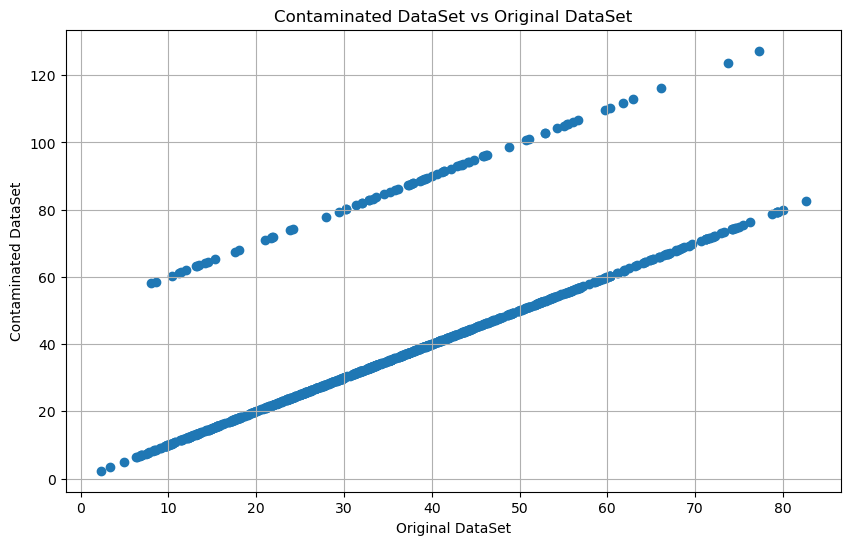

In [16]:
# Plot training set 1 against training set 2
plt.figure(figsize=(10, 6))
plt.scatter(x=df1_train.iloc[:, -1], y=df2_train.iloc[:, -1])
plt.title('Contaminated DataSet vs Original DataSet')
plt.xlabel('Original DataSet')
plt.ylabel('Contaminated DataSet')
plt.grid(True)
plt.show()

The contaminated dataset suits LAD regression better in comparison to OLS regression, therefore, the testing error (MSE) on the LAD regression is much smaller than the one from the OLS regression. This difference has mainly to do with the robustness of LAD regression regarding outliers. In LAD regression, the objective is to minimize the sum of the absolute differences between the predicted values and the true values. In contrast, OLS regression minimizes the sum of the squared differences (i.e., the mean squared error). OLS is much more suitable for datasets which meet the assumptions of normally distributed errors whereas LAD is the ideal choice for datasets with outliers.

### 3. Linear Classification

* In this question, we use a dataset about spam emails to study linear classifiers. For both training and testing data, the first 57 columns are different features of emails, such as the frequency of occurence of a particular word, and the last column shows whether an email is spam (1 for spam). We will train linear classifiers to predict if a given email is spam.
* Please refer to the following package for different linear classifiers.\

Linear Discriminant Analysis Classifier:
https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

Gaussian Naive Bayes Classifier:
https://scikit-learn.org/stable/modules/naive_bayes.html

Logistic Regression Classifier:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

* For this classification problem, we use classification error as the metric to evaluate the performance of trained models. Given $n$ samples, let $\{Y_i\}_{i=1}^n$ be the observed labels of the variable being predicted and $\{\hat{Y}_i\}_{i=1}^n$ be the predicted labels. Then the classification error of the predictor is computed as
<center>$\text{Classification Error} = \frac{1}{n} \sum_{i=1}^n \mathbb{1}(Y_i \neq \hat{Y}_i).$


#### a) Train a Linear Discriminant Analysis Classifier using the training set and report the classification error on the testing set.

In [17]:
### Import Datasets
df3_train = pd.read_csv('./Q3_train.csv')
df3_test = pd.read_csv('./Q3_test.csv')

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train, y_train = df3_train.iloc[:, :-1], df3_train.iloc[:, -1]
X_test, y_test = df3_test.iloc[:, :-1], df3_test.iloc[:, -1]

# Create an instance of the LDA classifier
lda_classifier = LinearDiscriminantAnalysis()

# Fit the LDA classifier to the training data
lda_classifier.fit(X_train, y_train)

# Predict labels for the testing data
lda_predictions = lda_classifier.predict(X_test)

# Calculate the classification error
classification_error = (y_test != lda_predictions).mean()

# Print the classification error
print("Classification Error (LDA):", classification_error)

Classification Error (LDA): 0.09940249864204237


#### b) Repeat the above using Gaussian Naive Bayes Classifier.

In [19]:
from sklearn.naive_bayes import GaussianNB

# Create an instance of the Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()

# Fit the Gaussian Naive Bayes classifier to the training data
gnb_classifier.fit(X_train, y_train)

# Predict labels for the testing data
gnb_predictions = gnb_classifier.predict(X_test)

# Calculate the classification error (error rate) using accuracy_score
classification_error = (y_test != gnb_predictions).mean()

# Print the classification error
print("Classification Error (Gaussian Naive Bayes):", classification_error)

Classification Error (Gaussian Naive Bayes): 0.19174361759913092


#### c) Repeat the above using Logistic Regression Classifier.

In [20]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression(solver='liblinear')

# Fit the Logistic Regression classifier to the training data
logistic_regression_classifier.fit(X_train, y_train)

# Predict labels for the testing data
logistic_regression_predictions = logistic_regression_classifier.predict(X_test)

# Calculate the classification error (error rate) using accuracy_score
classification_error = (y_test != logistic_regression_predictions).mean()

# Print the classification error
print("Classification Error (Logistic Regression):", classification_error)

### The classification error can be reduced slightly when specifying max_iter=10000

Classification Error (Logistic Regression): 0.07441607821835959


#### d) Please compare the classification errors of Linear Discriminant Analysis and Guassian Naive Bayes Classifier, and provide an explanation for the results.

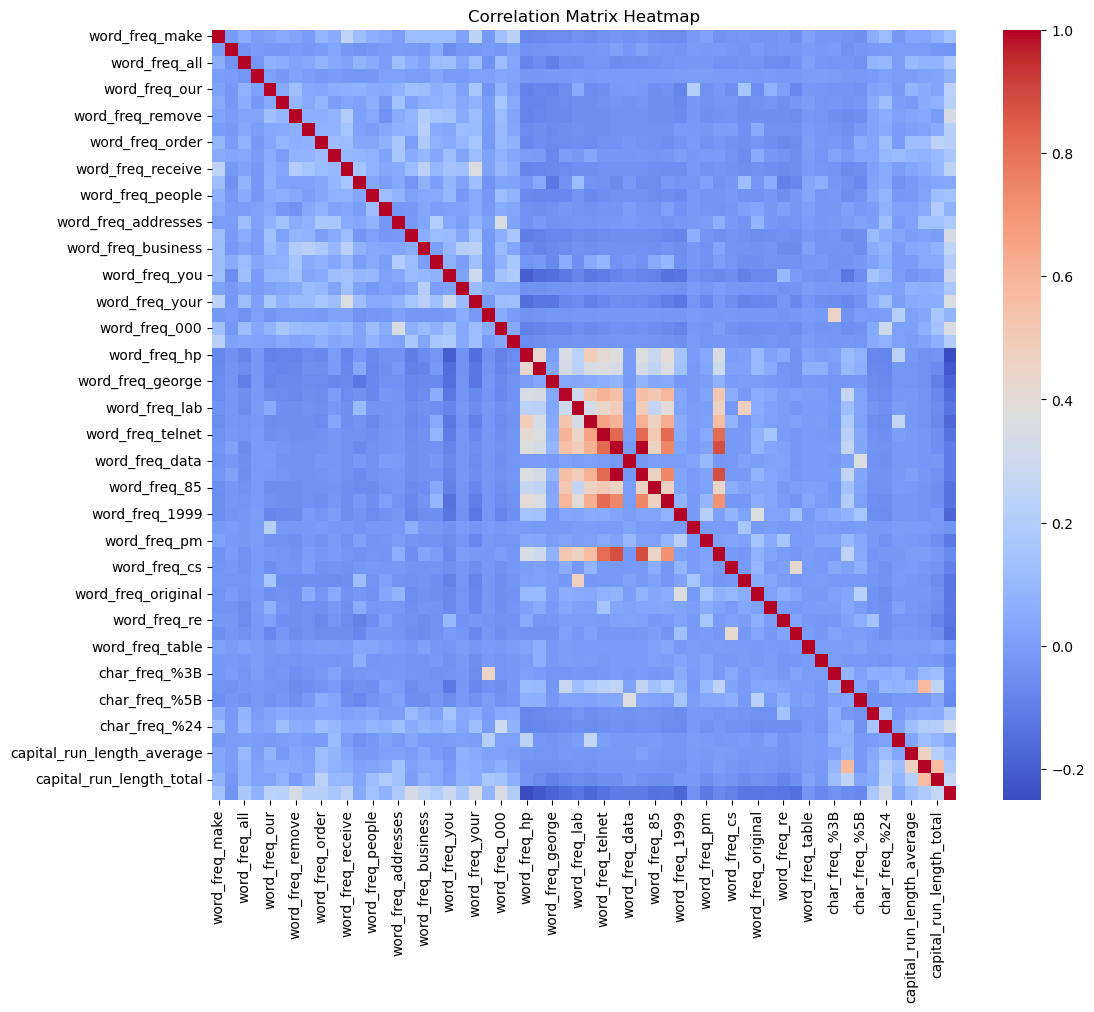

In [21]:
# Calculate the correlation matrix
correlation_matrix = df3_test.corr()

# Set up the Seaborn heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Given our results above, it is evident that the LDA classifier (0.09940249864204237) outperforms the Gaussian Naive Bayes classifier (0.19174361759913092) in terms of classification error on the given dataset. The huge difference in outcome comes according to my interpretation from the difference of the model assumptions. While LDA makes fewer assumptions about the conditional independence of the features and captures complex relationships quite good, GNB assumes that are conditionally independent given the class label. This might not hold true for this email dataset with 57 columns, since it contains complex dependencies between the different features. In fact, if we look at the correlation matrix of the testing dataset, we can see that the data contains some degree of correlation, which violates the indepence assumption of Naive Bayes, leading to a weaker results in this comparison.

#### e) Please compare the classification errors of Linear Discriminant Analysis and Logistic Regression, and provide an explanation for the results.

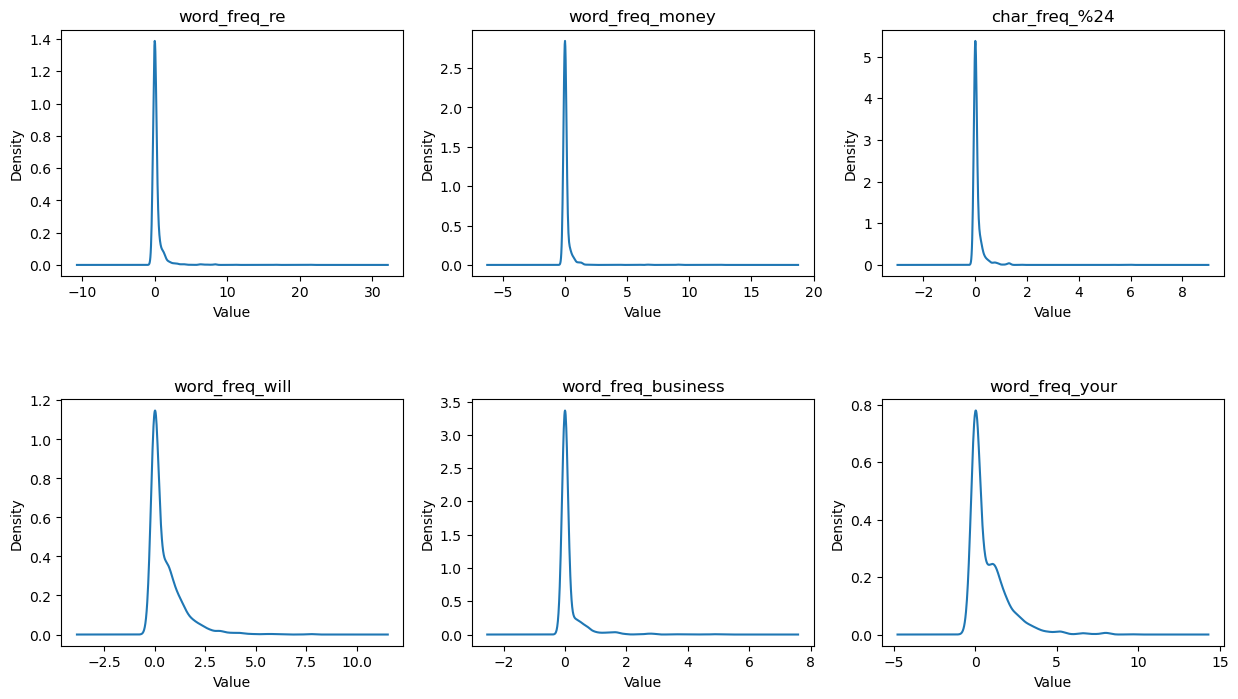

In [22]:
# Set a seed for reproducibility
random.seed(42)

# Get the column names
column_names = df3_test.columns.tolist()

# Shuffle the column order randomly
random.shuffle(column_names)

# Select the first 6 columns for visualization
columns_to_visualize = column_names[:6]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Plot KDE for each selected column on a separate subplot
for i, col in enumerate(columns_to_visualize):
    ax = axes[i // 3, i % 3]  # Get the current subplot
    df3_test[col].plot(kind='kde', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# If there are any leftover empty subplots, remove them
for i in range(len(columns_to_visualize), len(axes.ravel())):
    fig.delaxes(axes.ravel()[i])

# Show the plot
plt.show()


Given our results above, it is evident that the LDA classifier (0.09940249864204237) underperforms the Logistic Regression classifier (0.07441607821835959) in terms of classification error on the given dataset. In summary, the superior performance of Logistic Regression compared to LDA in this specific case could be attributed to the differences in model flexibility, assumptions, regularization, and the suitability of each method for the given data. Logistic Regression's ability to capture complex relationships and adapt to different data scenarios may have contributed to its better classification performance. Furthermore, since LDA assumes that the features are normally distributed within each class which is not a given fact in the underlying dataset, which we can see from the sample distribution plots of the dataset.

### 4. K Nearest Neighbor Classifier

* In this question, we use a dataset about diabetes to study K Nearest Neighbor Classifier. For both training and testing data, the first 8 columns are different diagnostic measurements of patients, such as Blppd Pressure and BMI, and the last column shows whether a patient has diabetes (1 for diabetes). We will train a K Nearest Neighbor Classifier to predict if a person has diabetes.
* Please refer to the following package for K Nearest Neighbor Classifier:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

#### a) Train a K Nearest Neighbor Classifier with Euclidean Distance (Try K=3,6,9,12,15) to fit provided the diabetes training set , and predict the responses of the testing set. Plot the classification error vs K.

In [23]:
### Import Datasets
df4_train = pd.read_csv('./Q4_train.csv')
df4_test = pd.read_csv('./Q4_test.csv')

In [24]:
from sklearn.neighbors import KNeighborsClassifier

X_train, y_train = df4_train.iloc[:, :-1], df4_train.iloc[:, -1]
X_test, y_test = df4_test.iloc[:, :-1], df4_test.iloc[:, -1]

# Create a list of K values to try
K_values = [3, 6, 9, 12, 15]

# Initialize lists to store classification errors
classification_errors_L2 = []

# Loop over different values of K
for K in K_values:
    # Create a KNN classifier with the current K value
    knn_classifier = KNeighborsClassifier(n_neighbors=K, p=2) # Euclidean Distance L2
    
    # Fit the KNN classifier to the training data
    knn_classifier.fit(X_train, y_train)
    
    # Predict labels for the testing data
    knn_predictions = knn_classifier.predict(X_test)
    
    # Calculate the classification error (error rate) using accuracy_score
    classification_error_L2 = (y_test != knn_predictions).mean()
    
    # Append the classification error to the list
    classification_errors_L2.append(classification_error_L2)

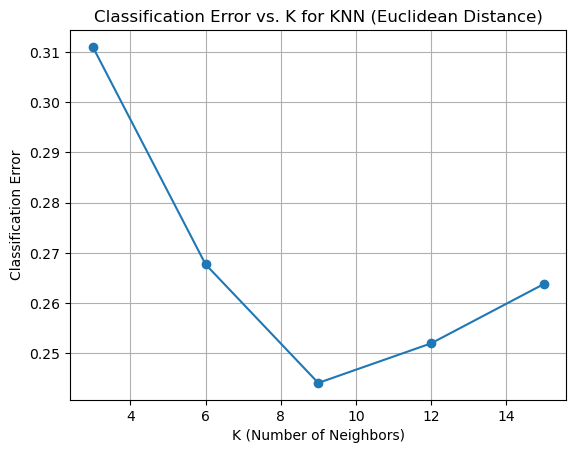

In [25]:
# Plot the classification error vs. K
plt.plot(K_values, classification_errors_L2, marker='o')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Classification Error')
plt.title('Classification Error vs. K for KNN (Euclidean Distance)')
plt.grid(True)
plt.show()

#### b) Repeat the above using a K Nearest Neighbor Classifier with Manhattan Distance ($L_1$-distance).

In [26]:
# Create a list of K values to try
K_values = [3, 6, 9, 12, 15]

# Initialize lists to store classification errors
classification_errors_L1 = []

# Loop over different values of K
for K in K_values:
    # Create a KNN classifier with the current K value
    knn_classifier = KNeighborsClassifier(n_neighbors=K, p=1) # Manhattan Distance L1
    
    # Fit the KNN classifier to the training data
    knn_classifier.fit(X_train, y_train)
    
    # Predict labels for the testing data
    knn_predictions = knn_classifier.predict(X_test)
    
    # Calculate the classification error (error rate) using accuracy_score
    classification_error_L1 = (y_test != knn_predictions).mean()
    
    # Append the classification error to the list
    classification_errors_L1.append(classification_error_L1)

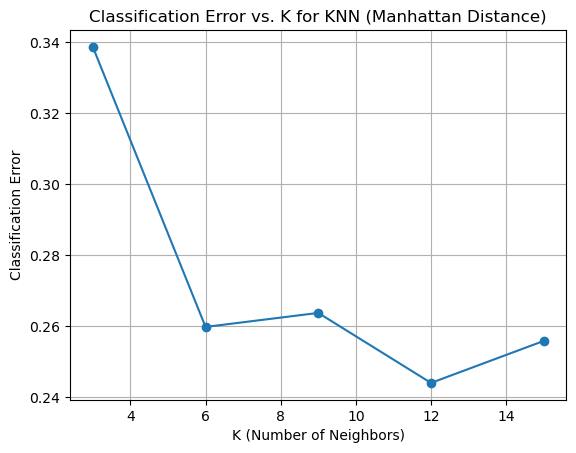

In [27]:
# Plot the classification error vs. K
plt.plot(K_values, classification_errors_L1, marker='o')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Classification Error')
plt.title('Classification Error vs. K for KNN (Manhattan Distance)')
plt.grid(True)
plt.show()

#### c) Repeat the above using a Logistic Regression Classifier, and compare its testing error with those of the K Nearest Neighbor Classifiers. Do you observe any difference? Why?

In [28]:
# Create an instance of the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression(solver='liblinear')

# Fit the Logistic Regression classifier to the training data
logistic_regression_classifier.fit(X_train, y_train)

# Predict labels for the testing data
logistic_regression_predictions = logistic_regression_classifier.predict(X_test)

# Calculate the classification error (error rate) using accuracy_score
classification_error = (y_test != logistic_regression_predictions).mean()

# Print the classification error
print("Classification Error (Logistic Regression):", classification_error)

Classification Error (Logistic Regression): 0.20866141732283464


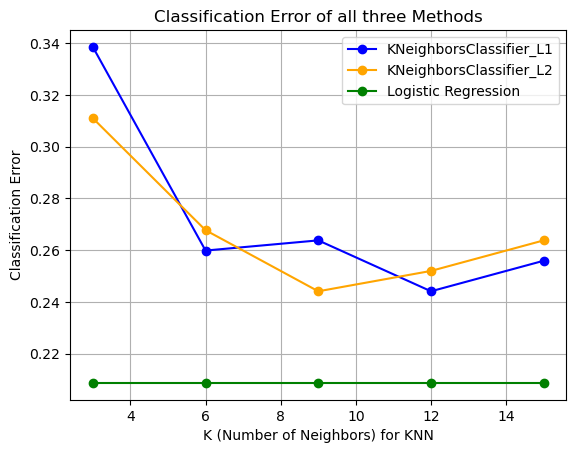

In [29]:
# Plot the results against each other
plt.plot(K_values, classification_errors_L1, marker='o', label='KNeighborsClassifier_L1', color='blue')
plt.plot(K_values, classification_errors_L2, marker='o', label='KNeighborsClassifier_L2', color='orange')
plt.plot(K_values, [classification_error]*5, marker='o', label='Logistic Regression', color='green')

plt.xlabel('K (Number of Neighbors) for KNN')
plt.ylabel('Classification Error')
plt.title('Classification Error of all three Methods')
plt.legend()
plt.grid(True)
plt.show()

While comparing the three methods one fact is true for sure, the Logistic Regression outperforms both, the KNN using L1 and L2 norm. Logistic Regression is a linear model that assumes a linear relationship between the features and the target variable (diabetes in this case). It finds a linear decision boundary in the feature space. KNN, on the other hand, is a non-parametric algorithm that doesn't make strong assumptions about the data distribution. It is based on distance metrics and considers k nearest neighbors to make predictions. KNN's performance can also be influenced by the distribution of data points in the feature space. If the data is not evenly distributed and there are regions with high density and others with low density, KNN might struggle to make accurate predictions in the sparse regions, which could be the case here. If we give a look into the density plots of the different variables, we can see that the dataset contains many variables with regions of high and low densities. Additionally, another problem of the KNN could be the curse of dimensionality and the sample size (n=254), which is not exponentially large to achieve a good performance. Finally, L1 and L2 norm perform approximately the same, if we allow for a flexible number of KNN's (best-case).

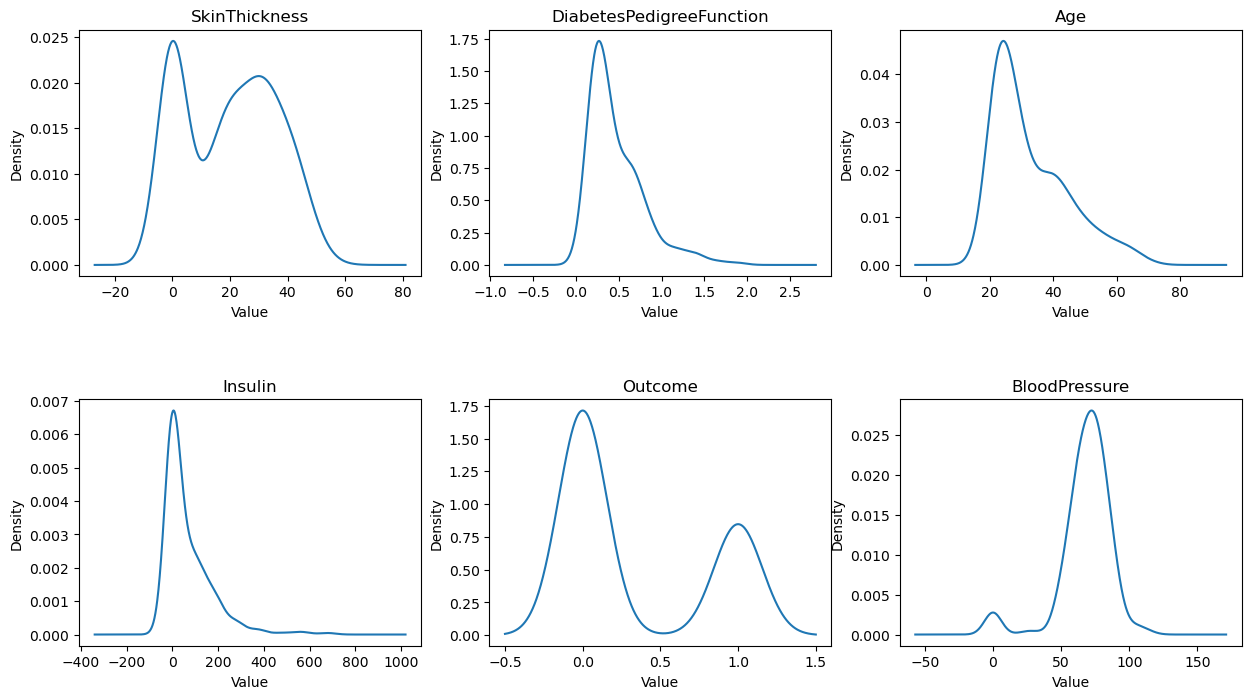

In [30]:
# Set a seed for reproducibility
random.seed(42)

# Get the column names
column_names = df4_test.columns.tolist()

# Shuffle the column order randomly
random.shuffle(column_names)

# Select the first 6 columns for visualization
columns_to_visualize = column_names[:6]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Plot KDE for each selected column on a separate subplot
for i, col in enumerate(columns_to_visualize):
    ax = axes[i // 3, i % 3]  # Get the current subplot
    df4_test[col].plot(kind='kde', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# If there are any leftover empty subplots, remove them
for i in range(len(columns_to_visualize), len(axes.ravel())):
    fig.delaxes(axes.ravel()[i])

# Show the plot
plt.show()